<a href="https://colab.research.google.com/github/suha6194/my-colab-notebooks/blob/main/SCT_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Accuracy: 0.8935087913303107

📊 Confusion Matrix:
 [[7644  308]
 [ 655  436]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



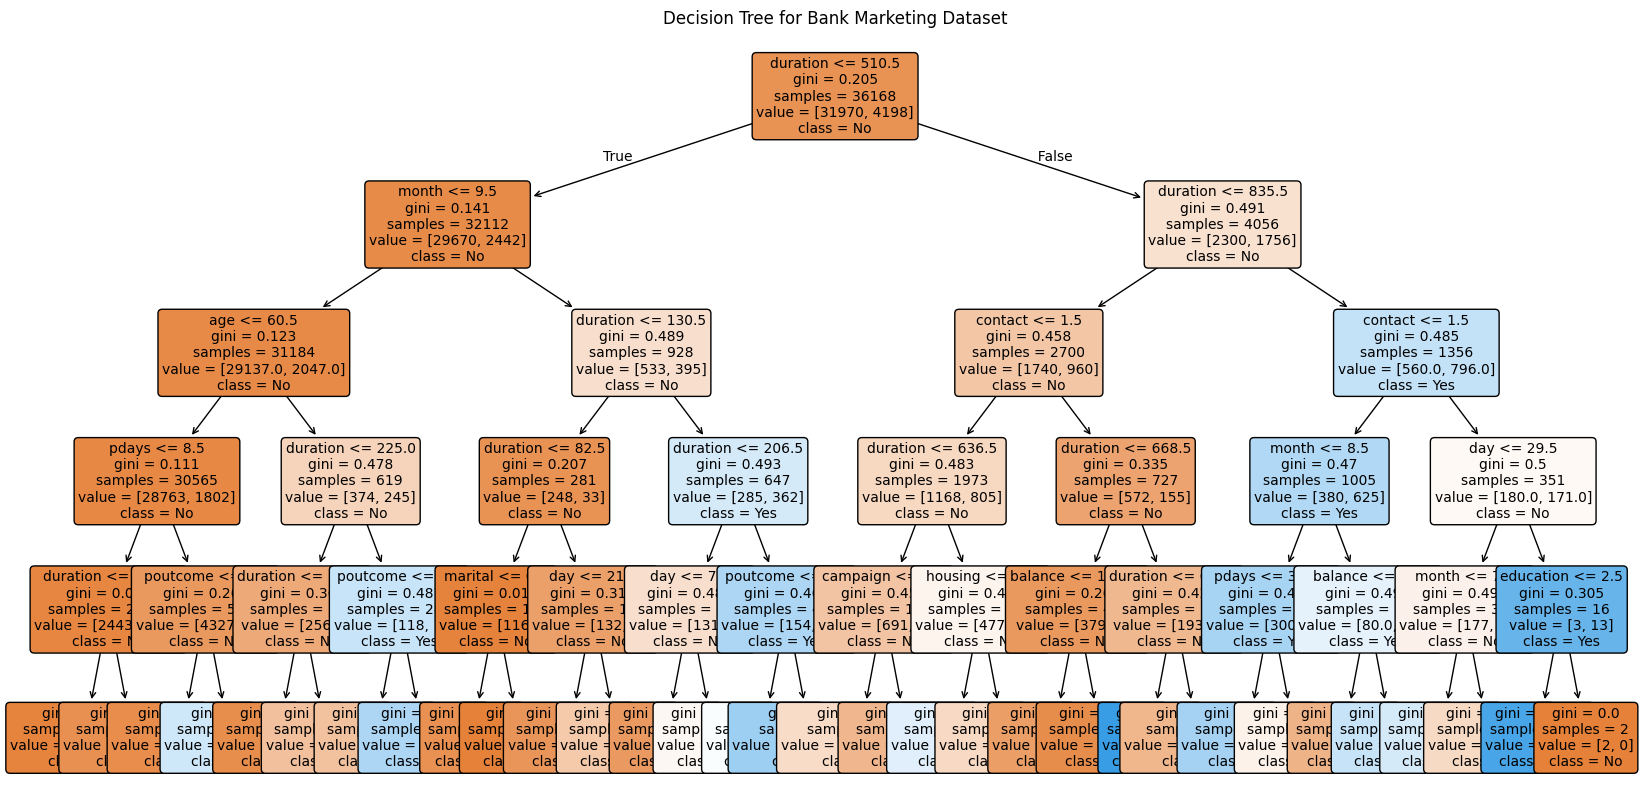

In [2]:
# 📌 Step 1: Import Libraries
import pandas as pd
import zipfile
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 📌 Step 2: Load the Dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Read the full dataset (bank-full.csv inside the zip)
df = pd.read_csv(zip_file.open("bank-full.csv"), sep=';')

# 📌 Step 3: Preprocess the Data
# Encode categorical variables
df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# 📌 Step 4: Split Features and Target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# 📌 Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 📌 Step 6: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 📌 Step 7: Evaluate the Model
y_pred = clf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 8: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Bank Marketing Dataset")
plt.show()
